<a href="https://colab.research.google.com/github/caguirre5/Lab10-DS/blob/main/Lab10_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!gdown 1tsbhZVU3O09Fs5bEpSpTw8bNx2fRa7wI
!gdown 1hTZ06CrtiTTPk_4WXyR230v4GNxm1jOS

Downloading...
From: https://drive.google.com/uc?id=1tsbhZVU3O09Fs5bEpSpTw8bNx2fRa7wI
To: /content/ENCOVI_Hogar.sav
100% 9.92M/9.92M [00:00<00:00, 126MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hTZ06CrtiTTPk_4WXyR230v4GNxm1jOS
To: /content/ENCOVI_Personas.sav
100% 72.1M/72.1M [00:00<00:00, 95.9MB/s]


In [39]:
%pip install pyreadstat

## 1. Preparación de Datos

In [40]:
import pyreadstat
import pandas as pd

data_hogar, metadata_hogar = pyreadstat.read_sav("ENCOVI_Hogar.sav")
df_H = pd.DataFrame(data_hogar)
data_personas, metadata_personas = pyreadstat.read_sav("ENCOVI_Personas.sav")
df_P = pd.DataFrame(data_personas)

columnas_deseadas_df_H = ['POBREZA', 'REGION', 'DEPTO', 'AREA', 'THOGAR', 'PPB01', 'PPB02', 'PPB04', 'PPA11A', 'P01A01', 'P01A02', 'P01A03', 'P01A04', 'P01A05A', 'P01A05C', 'P01A06', 'P01D03', 'P01D08', 'MES_ENC', 'A_ENC']
df_H = df_H[columnas_deseadas_df_H]

columnas_deseadas_df_P = ['POBREZA', 'REGION', 'DEPTO', 'AREA', 'THOGAR', 'PPA02', 'PPA03', 'PPA06']
df_P = df_P[columnas_deseadas_df_P]

# Renombrar las columnas en DataFrame df_H
nombres_columnas_df_H = {
    'Pobreza': 'POBREZA',
    'Region': 'REGION',
    'Departamento': 'DEPTO',
    'Area': 'AREA',
    'Thogar': 'THOGAR',
    'PPB01': 'COCINAN',
    'PPB02': 'CANT_HOGARES',
    'PPB04': 'CANT_HABITANTES',
    'PPA11A': 'VIVE_EN_OTRO_PAIS',
    'P01A01': 'TIPO_HOGAR',
    'P01A02': 'MATERIAL_PARED',
    'P01A03': 'MATERIAL_TECHO',
    'P01A04': 'MATERIAL_PISO',
    'P01A05A': 'RED_AGUA',
    'P01A05C': 'RED_ELECTRICA',
    'P01A06': 'HABITACIONES',
    'P01D03': 'NEGOCIOS',
    'P01D08': 'TIPO_SERVICIO_AGUA',
    'MES_ENC': 'MES_ENC',
    'A_ENC': 'A_ENC'
}

df_H = df_H.rename(columns=nombres_columnas_df_H)

# Renombrar las columnas en DataFrame df_P
nombres_columnas_df_P = {
    'Pobreza': 'POBREZA',
    'Region': 'REGION',
    'Departamento': 'DEPTO',
    'Area': 'AREA',
    'Thogar': 'THOGAR',
    'PPA02': 'SEXO',
    'PPA03': 'EDAD',
    'PPA06': 'ESTADO_CIVIL'
}

df_P = df_P.rename(columns=nombres_columnas_df_P)

df_H['TIPO_SERVICIO_AGUA'].fillna(4, inplace=True)

In [41]:
df_H

,POBREZA,REGION,DEPTO,AREA,THOGAR,COCINAN,CANT_HOGARES,CANT_HABITANTES,VIVE_EN_OTRO_PAIS,TIPO_HOGAR,MATERIAL_PARED,MATERIAL_TECHO,MATERIAL_PISO,RED_AGUA,RED_ELECTRICA,HABITACIONES,NEGOCIOS,TIPO_SERVICIO_AGUA,MES_ENC,A_ENC
0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,0.0,1.0,8.0,2014.0
1,3.0,1.0,1.0,1.0,3.0,2.0,1.0,3.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,8.0,2014.0
2,2.0,1.0,1.0,1.0,18.0,2.0,1.0,18.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,8.0,2014.0
3,2.0,1.0,1.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,8.0,2014.0
4,3.0,1.0,1.0,1.0,3.0,2.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,6.0,0.0,1.0,8.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,3.0,8.0,17.0,2.0,3.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,4.0,1.0,1.0,3.0,0.0,1.0,12.0,2014.0
11532,1.0,8.0,17.0,2.0,11.0,2.0,1.0,11.0,2.0,1.0,2.0,1.0,4.0,1.0,1.0,2.0,0.0,1.0,12.0,2014.0
11533,2.0,8.0,17.0,2.0,4.0,2.0,1.0,4.0,2.0,1.0,5.0,2.0,7.0,2.0,2.0,1.0,0.0,4.0,12.0,2014.0
11534,3.0,8.0,17.0,2.0,3.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,0.0,1.0,12.0,2014.0


In [42]:
df_P

,POBREZA,REGION,DEPTO,AREA,THOGAR,SEXO,EDAD,ESTADO_CIVIL
0,3.0,1.0,1.0,1.0,3.0,1.0,60.0,1.0
1,3.0,1.0,1.0,1.0,3.0,2.0,55.0,1.0
2,3.0,1.0,1.0,1.0,3.0,2.0,40.0,7.0
3,3.0,1.0,1.0,1.0,3.0,2.0,52.0,7.0
4,3.0,1.0,1.0,1.0,3.0,1.0,30.0,7.0
...,...,...,...,...,...,...,...,...
54817,1.0,8.0,17.0,2.0,6.0,2.0,26.0,1.0
54818,1.0,8.0,17.0,2.0,6.0,1.0,9.0,8.0
54819,1.0,8.0,17.0,2.0,6.0,2.0,7.0,8.0
54820,1.0,8.0,17.0,2.0,6.0,2.0,5.0,8.0


In [43]:
from sklearn.model_selection import train_test_split

# Splitting df_H
X_H = df_H.drop('POBREZA', axis=1)  # Features
y_H = df_H['POBREZA']  # Target variable

# Splitting df_P
X_P = df_P.drop('POBREZA', axis=1)  # Features
y_P = df_P['POBREZA']  # Target variable

# Splitting df_H into training and testing sets
X_train_H, X_test_H, y_train_H, y_test_H = train_test_split(X_H, y_H, test_size=0.2, random_state=42)

# Splitting df_P into training and testing sets
X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(X_P, y_P, test_size=0.2, random_state=42)


In [44]:
X_train_H['POBREZA'] = y_train_H
X_train_P['POBREZA'] = y_train_P

## 2. Construcción de Modelo

In [45]:
%pip install -U pip
%pip install -U setuptools wheel
%pip install -U "mxnet<2.0.0"
%pip install autogluon --no-cache-dir
%pip install autogluon autogluon.tabular

  Using cached setuptools-68.2.2-py3-none-any.whl.metadata (6.3 kB)
Using cached setuptools-68.2.2-py3-none-any.whl (807 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
openxlab 0.0.28 requires setuptools~=60.2.0, but you have setuptools 68.2.2 which is incompatible.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
torchaudio 2.1.0+cu118 requires torch==2.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.2.2
    Uninstalling setuptools-68.2.2:
      Successfully uninstalled setuptools-68.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cvxpy 1.3.2 requires setuptools>65.5.1, but you have setuptools 60.2.0 which is incompatible.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
torchaudio 2.1.0+cu118 requires torch==2.1.0, but you have torch 1.13.1 which is incompatib

In [46]:
from autogluon.tabular import TabularDataset, TabularPredictor
predictor_H = TabularPredictor(
    label="POBREZA",
    problem_type='regression',
    eval_metric='root_mean_squared_error'
).fit(train_data=X_train_H, time_limit=200, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20231111_193932/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20231111_193932/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
Disk Space Avail:   78.33 GB / 115.66 GB (67.7%)
Train Data Rows:    9228
Train Data Columns: 19
Label Column: POBREZA
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10960.19 MB
	Train Data (Original)  Memory Usage: 1.4 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Gene

In [47]:
predictor_P = TabularPredictor(
    label="POBREZA",
    problem_type='regression',
    eval_metric='root_mean_squared_error'
).fit(train_data=X_train_P, time_limit=200, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20231111_194322/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20231111_194322/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
Disk Space Avail:   78.22 GB / 115.66 GB (67.6%)
Train Data Rows:    43857
Train Data Columns: 7
Label Column: POBREZA
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10640.87 MB
	Train Data (Original)  Memory Usage: 2.46 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Gen

## 3. Evaluación de Modelo

                    model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2  -0.520261       4.070419  100.868315                0.002545           2.722105            2       True          6
1         LightGBM_BAG_L1  -0.521795       0.516130   39.283143                0.516130          39.283143            1       True          4
2     WeightedEnsemble_L3  -0.522338       7.581970  183.334615                0.001509           0.314202            3       True          9
3       LightGBMXT_BAG_L2  -0.522991       7.462025  143.192971                0.211203          37.953358            2       True          7
4         LightGBM_BAG_L2  -0.524403       7.369258  145.067055                0.118435          39.827442            2       True          8
5       LightGBMXT_BAG_L1  -0.525440       0.686023   58.770869                0.686023          58.770869            1       True          3
6  Ran

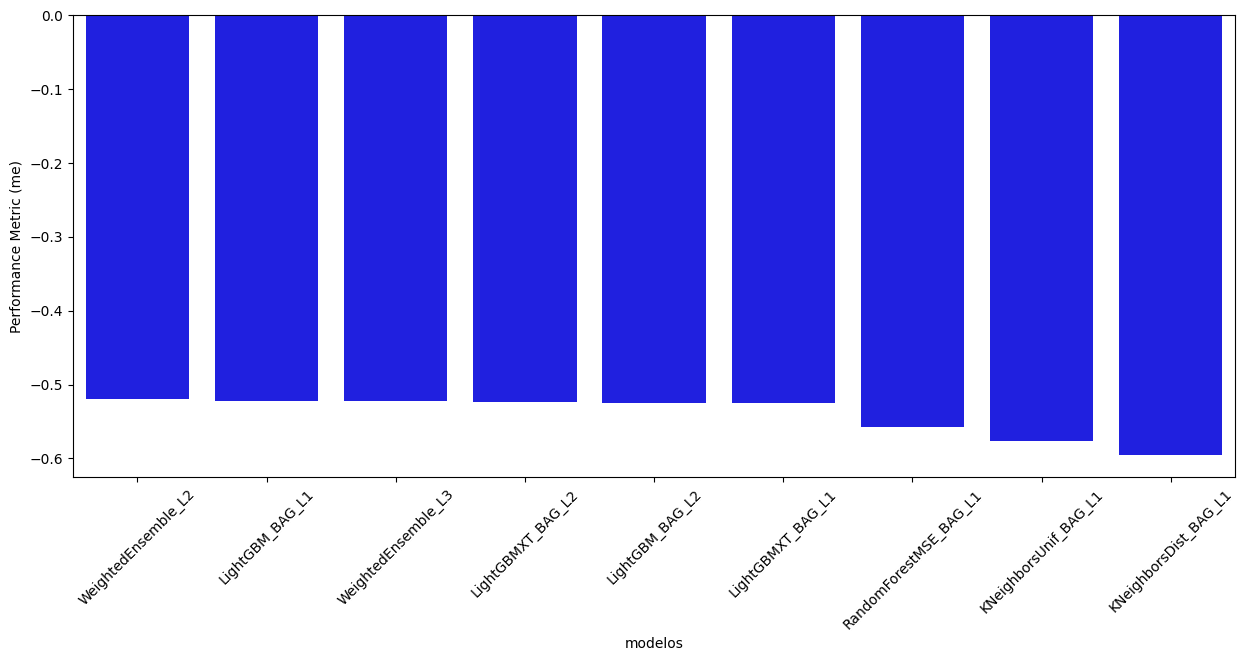

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor_H.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (me)", xlabel = "modelos")
plt.xticks(rotation = 45);

                   model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3  -0.604345      25.054618  197.671065                0.001789           0.421356            3       True          7
1        LightGBM_BAG_L2  -0.604370      23.286610  154.200410                2.190429          43.304476            2       True          6
2      LightGBMXT_BAG_L2  -0.607439      22.862401  153.945233                1.766219          43.049300            2       True          5
3    WeightedEnsemble_L2  -0.608270      19.548028  111.339210                0.002263           0.789235            2       True          4
4      LightGBMXT_BAG_L1  -0.608472      17.964797  110.311734               17.964797         110.311734            1       True          3
5  KNeighborsUnif_BAG_L1  -0.685140       1.550417    0.345959                1.550417           0.345959            1       True          1
6  KNeighbors

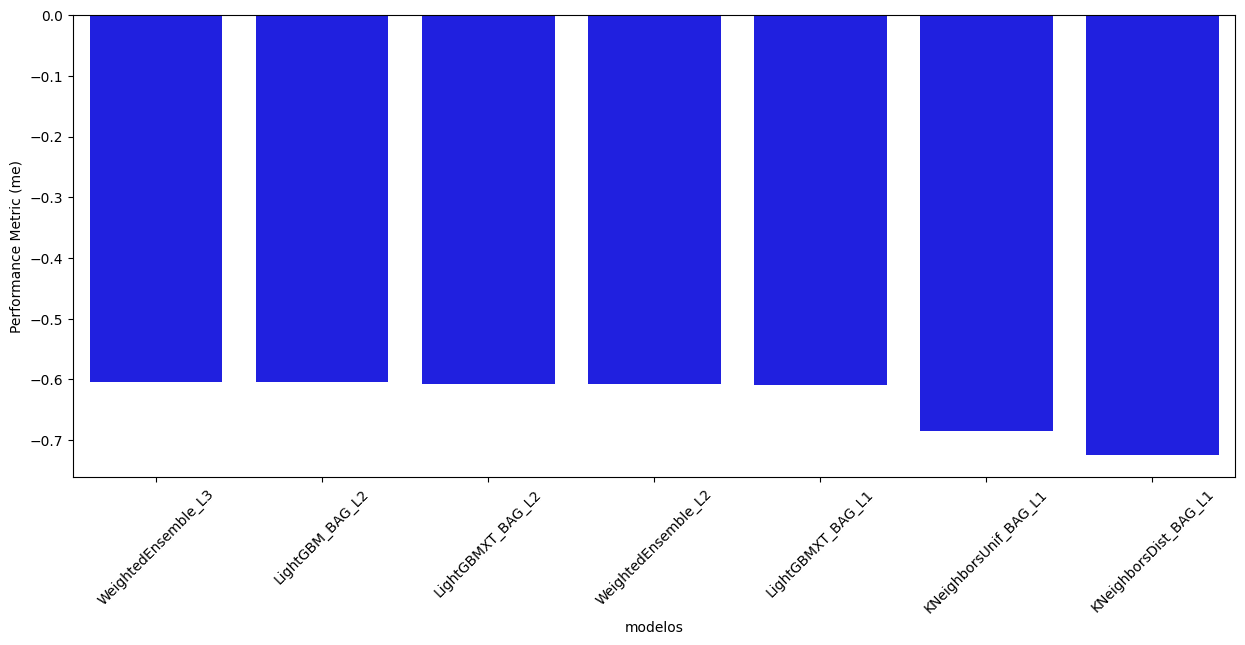

In [49]:
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor_P.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (me)", xlabel = "modelos")
plt.xticks(rotation = 45);

En ambos casos el modelo **LightGBMXT_BAG_L2** es el mejor ya que tiene un mse menor

In [50]:
X_test_H['POBREZA'] = y_test_H
X_test_P['POBREZA'] = y_test_P

In [51]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Suponiendo que y_true son las etiquetas reales y predictions son las predicciones
predictions = predictor_P.predict(X_test_P)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test_P, predictions)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)

print('--- Modelo de Personas ---')
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')


# Suponiendo que y_true son las etiquetas reales y predictions son las predicciones
predictions = predictor_H.predict(X_test_H)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test_H, predictions)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)

print('--- Modelo de Hogares ---')
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')



--- Modelo de Personas ---
Error Cuadrático Medio (MSE): 0.3640166809487199
Raíz del Error Cuadrático Medio (RMSE): 0.6033379492031973
--- Modelo de Hogares ---
Error Cuadrático Medio (MSE): 0.25617363967914486
Raíz del Error Cuadrático Medio (RMSE): 0.5061359893142799


## 4. Optimización y Ajuste

In [52]:
X_train_H = X_train_H.drop([
  'COCINAN',
  'CANT_HOGARES',
  'VIVE_EN_OTRO_PAIS',
  'TIPO_HOGAR',
  'A_ENC',
], axis=1)


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Suponiendo que y_true son las etiquetas reales y predictions son las predicciones
predictions = predictor_P.predict(X_test_P)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test_P, predictions)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)

print('--- Modelo de Personas ---')
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')


# Suponiendo que y_true son las etiquetas reales y predictions son las predicciones
predictions = predictor_H.predict(X_test_H)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test_H, predictions)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)

print('--- Modelo de Hogares ---')
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')



In [53]:
X_test_H = X_test_H.drop([
  'COCINAN',
  'CANT_HOGARES',
  'VIVE_EN_OTRO_PAIS',
], axis=1)

In [55]:
predictor_H = TabularPredictor(
    label="POBREZA",
    problem_type='regression',
    eval_metric='root_mean_squared_error'
).fit(
    train_data=X_train_H,
    time_limit=200,
    presets="best_quality",
)


No path specified. Models will be saved in: "AutogluonModels/ag-20231111_195213/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20231111_195213/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
Disk Space Avail:   78.03 GB / 115.66 GB (67.5%)
Train Data Rows:    9228
Train Data Columns: 14
Label Column: POBREZA
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10243.83 MB
	Train Data (Original)  Memory Usage: 1.03 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Gen

In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Suponiendo que y_true son las etiquetas reales y predictions son las predicciones
predictions = predictor_P.predict(X_test_P)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test_P, predictions)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)

print('--- Modelo de Personas ---')
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')


# Suponiendo que y_true son las etiquetas reales y predictions son las predicciones
predictions = predictor_H.predict(X_test_H)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test_H, predictions)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)

print('--- Modelo de Hogares ---')
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')



--- Modelo de Personas ---
Error Cuadrático Medio (MSE): 0.3640166809487199
Raíz del Error Cuadrático Medio (RMSE): 0.6033379492031973
--- Modelo de Hogares ---
Error Cuadrático Medio (MSE): 0.25679058295617113
Raíz del Error Cuadrático Medio (RMSE): 0.5067450867607609
